In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import auc
import numpy as np

In [16]:
# Define plot function: error vs power (semilogx)
def plot_results(r: pd.DataFrame):
    fig, ax = plt.subplots(1,1, figsize=(6, 3))
    kwargs = {"lw":2, "ms":4, "alpha": 1}

    # Theoretical bound
    ax.semilogx(r["error"], r["power_bound"], "r-^", label = 'Theoretical', **kwargs)

    # BN
    ax.semilogx(r["error"], r["power_BN"], "-o", label = 'BN', **kwargs)

    # CN (avg, min, max)
    ax.semilogx(r["error"], r["CN_avg"], "-s", label = f'CN Avg', **kwargs)
    ax.fill_between(r["error"], r["CN_min"], r["CN_max"], color="b", alpha=0.5)

    # Plot info
    ax.set(title='Semilogx')
    ax.legend()

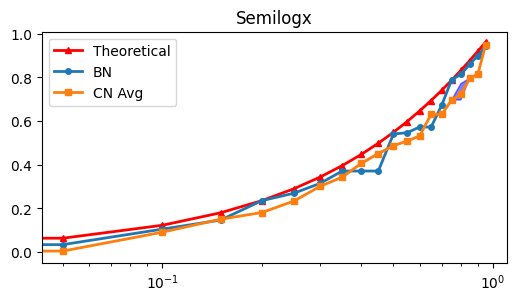

In [17]:
# Import all results
path = "./results/idm"
results = os.listdir(path)

# Choose which one to plot
r_path = f"{path}/exp_1-compl15.csv"
results = pd.read_csv(r_path)

# Plot results
plot_results(results)

In [18]:
results.head()

,error,power_bound,power_BN,CN_avg,CN_max,CN_min
0,0.00,0.000000,0.0000,0.0000,0.0000,0.0000
1,0.05,0.063957,0.0345,0.0050,0.0050,0.0050
2,0.10,0.123212,0.1055,0.0915,0.0915,0.0915
3,0.15,0.180369,0.1470,0.1510,0.1510,0.1510
4,0.20,0.236025,0.2360,0.1815,0.1815,0.1815


In [19]:
# Compute AUCs
print(f"BN AUC: {auc(results['error'], results['power_BN'])}")
print(f"CN Avg AUC: {auc(results['error'], results['CN_avg'])}")

BN AUC: 0.44819999999999993
CN Avg AUC: 0.42295833333333327
